# Assignment - Advanced Regression

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

#### The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

### Step 1.   Importing modules, Reading the data

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#functions for scatter plot and bar plot of features w.r.t salePrice
def scatterPlot(columns):
    fig=plt.subplots(figsize=(12, 12))

    for i, feature in enumerate(columns):
        plt.subplot(9, 3, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
        plt.tight_layout()
def barPlot(columns):
    fig=plt.subplots(figsize=(12, 12))

    for i, feature in enumerate(columns):
        plt.subplot(9, 3, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.barplot(housing_df[feature], housing_df['SalePrice'])
        plt.tight_layout()
        
def distPlot(columns):
    fig=plt.subplots(figsize=(12, 12))

    for i, feature in enumerate(numeric_df.columns):
        plt.subplot(9, 3, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.distplot(housing_df[feature])
        plt.tight_layout()
        
def missingValueHandle(columns):
    print("Feature : Percentage of Missing Value")
    print("=====================================")
    for feat in columns:
        if housing_df[feat].isnull().any():
            print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)
            
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing_df['SalePrice'], housing_df[feature])
        plt.tight_layout()
        
        
# ID is constant we can remove it.
housing_df.drop(['Id'],axis=1, inplace=True)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])
# Numerical features in the dataframe
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Step 2. Analyzing Numerical Data

#### Outlier Detection

Checking percentage of outliers for all the numerical columns.

In [6]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
29,EnclosedPorch,14.25
9,BsmtFinSF2,11.44
4,OverallCond,8.56
31,ScreenPorch,7.95
0,MSSubClass,7.05
7,MasVnrArea,6.58
1,LotFrontage,6.03
17,BsmtHalfBath,5.62
28,OpenPorchSF,5.27
2,LotArea,4.73


**Comment:**
- Majority of the numeric features  have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]**
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [7]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [8]:
# Checking the dataset after reassigning minmum and maximum values

housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


In [9]:
# from the above table we can remove features having fixed values which are not contributing
housing_df.drop(['LowQualFinSF','BsmtFinSF2','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1, inplace=True)
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

#### Correlation in Numeric Data

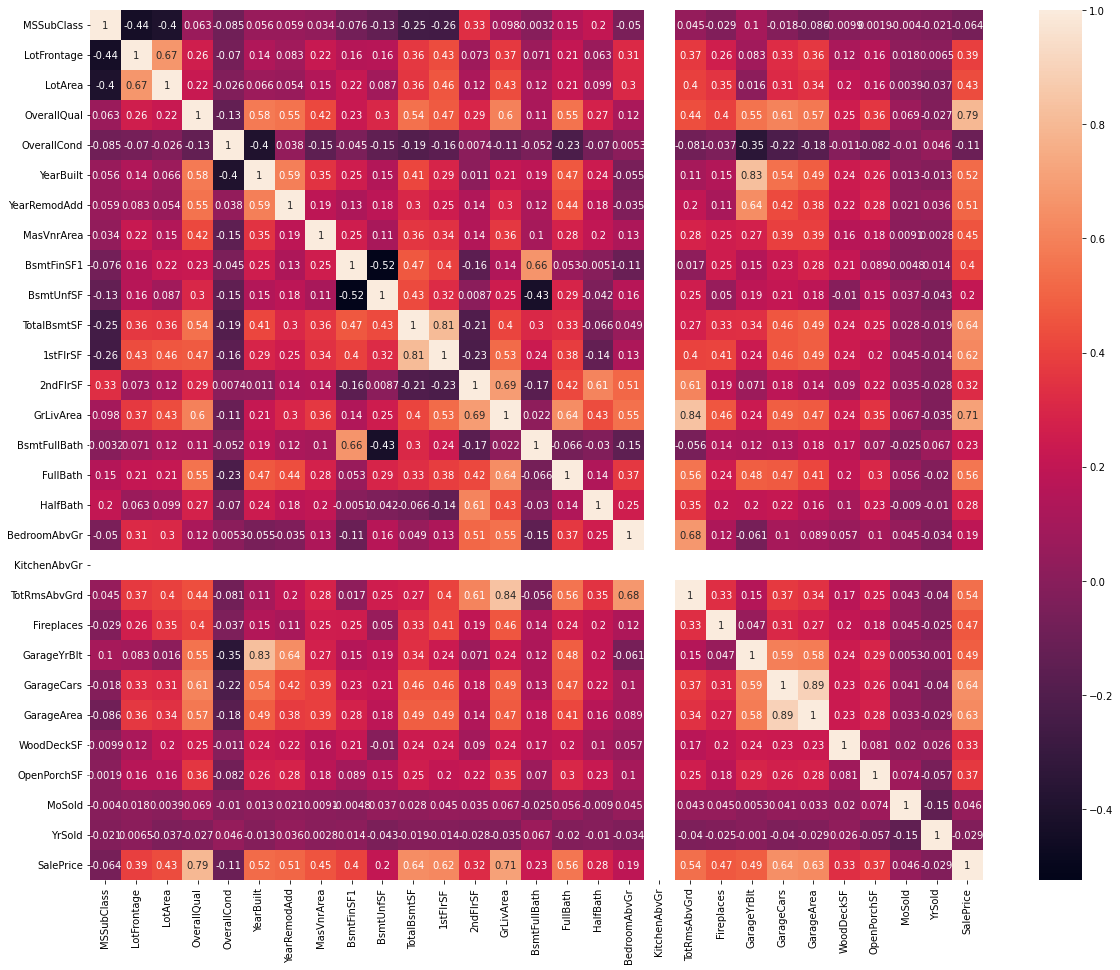

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

**Comment**
- Some of the features have high correlation with each other
- GarageCars and GarageArea (0.89)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.84)
- TotalBsmtSF and 1stFlrSF (0.81)

One feature from each of these pair will be dropped after data visualization.

In [11]:
housing_df.drop(['GarageCars','GarageYrBlt','GrLivArea','TotalBsmtSF'],axis=1, inplace=True)
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5.0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,GasA,Ex,Y,SBrkr,856.0,854,1.0,2,1,3.0,1,Gd,8,Typ,0.0,NaN,Attchd,RFn,548.0,TA,TA,Y,0,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,7.5,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,GasA,Ex,Y,SBrkr,1262.0,0,0.0,2,0,3.0,1,TA,6,Typ,1.0,TA,Attchd,RFn,460.0,TA,TA,Y,298,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5.0,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,GasA,Ex,Y,SBrkr,920.0,866,1.0,2,1,3.0,1,Gd,6,Typ,1.0,TA,Attchd,RFn,608.0,TA,TA,Y,0,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5.0,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,GasA,Gd,Y,SBrkr,961.0,756,1.0,1,0,3.0,1,Gd,7,Typ,1.0,Gd,Detchd,Unf,642.0,TA,TA,Y,0,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5.0,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,GasA,Ex,Y,SBrkr,1145.0,1053,1.0,2,1,4.0,1,Gd,9,Typ,1.0,TA,Attchd,RFn,836.0,TA,TA,Y,192,84,NaN,NaN,NaN,12,2008,WD,Normal,250000


### Step 3: Univariate and Bivariate Analysis - Numerical Features

##### Analyzing Numerical Features with continuous values

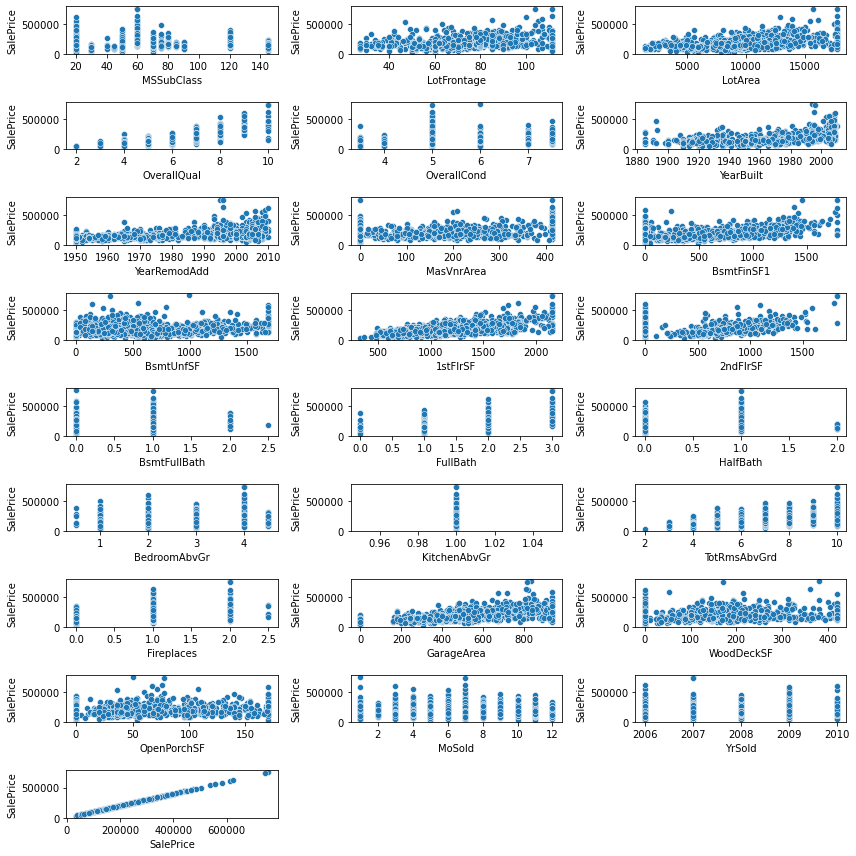

In [12]:
scatterPlot(numeric_df.columns)

**Comment:**

- Features like 'LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BSMtUnfSF','1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF','OpwnPorchSF' are Continuous Numerical variable in that only 'MasVnrArea','BsmtFinSF1','BSMtUnfSF','2ndFlrSF','WoodDeckSF','OpwnPorchSF' not showing positive correlation with SalePrice. Hence we can remove others.
- 'MSSubClass','MoSold','YrSold','Fireplaces','TotRmsAbvGrd','BedroomAbvGr','HalfBath','FullBath','BsmtFullBath','OverallQual', 'OverallCond' has discrete values
- 'KitchenAbvGr' has single value and can be dropped.

In [13]:
housing_df.drop(['KitchenAbvGr','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','WoodDeckSF','OpenPorchSF'],axis=1, inplace=True)
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5.0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,856.0,1.0,2,1,3.0,Gd,8,Typ,0.0,NaN,Attchd,RFn,548.0,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,7.5,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,1262.0,0.0,2,0,3.0,TA,6,Typ,1.0,TA,Attchd,RFn,460.0,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5.0,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,920.0,1.0,2,1,3.0,Gd,6,Typ,1.0,TA,Attchd,RFn,608.0,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5.0,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,961.0,1.0,1,0,3.0,Gd,7,Typ,1.0,Gd,Detchd,Unf,642.0,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5.0,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1145.0,1.0,2,1,4.0,Gd,9,Typ,1.0,TA,Attchd,RFn,836.0,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal,250000


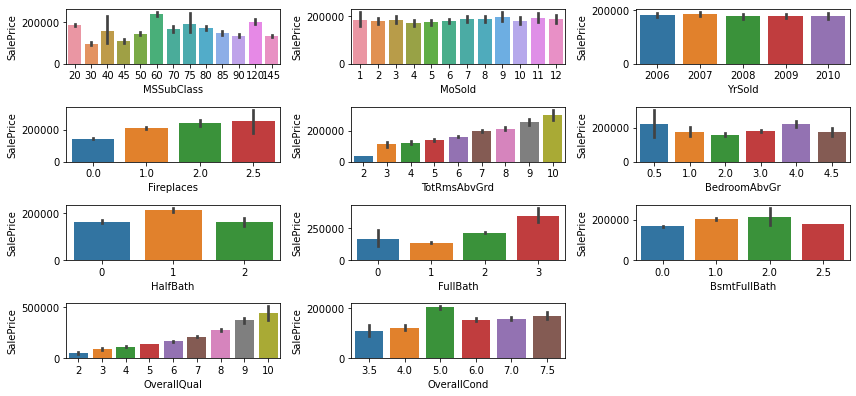

In [14]:
barPlot(['MSSubClass','MoSold','YrSold','Fireplaces','TotRmsAbvGrd','BedroomAbvGr','HalfBath','FullBath','BsmtFullBath','OverallQual', 'OverallCond'])

**Comment:**
Following are the observations from the plots.
- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice 

- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

- 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

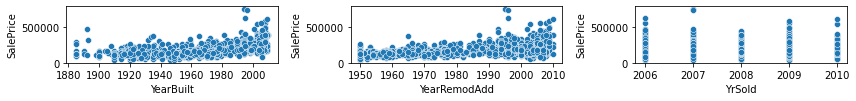

In [15]:
columnar=['YearBuilt','YearRemodAdd', 'YrSold']
scatterPlot(columnar)

In [16]:
# Converting the year related features into number of years

for feature in ['YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2021 - housing_df[feature]

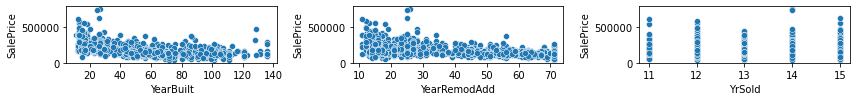

In [17]:
columnar=['YearBuilt','YearRemodAdd', 'YrSold']
scatterPlot(columnar)

**Comment:**
- For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
- SalePrice is more lower value of YearBuilt i.e. more recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice 
- YrSold still does not show any significant trend

#### Missing Value Handling - Numerical Features

In [18]:
missingValueHandle(housing_df.select_dtypes(exclude=['object']).columns)

Feature : Percentage of Missing Value
LotFrontage  :  18.0


In [19]:
housing_df.drop(['YrSold','LotFrontage'],axis=1, inplace=True)
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])
housing_df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5.0,18,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,856.0,1.0,2,1,3.0,Gd,8,Typ,0.0,NaN,Attchd,RFn,548.0,TA,TA,Y,NaN,NaN,NaN,2,WD,Normal,208500
1,20,RL,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,7.5,45,45,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,1262.0,0.0,2,0,3.0,TA,6,Typ,1.0,TA,Attchd,RFn,460.0,TA,TA,Y,NaN,NaN,NaN,5,WD,Normal,181500
2,60,RL,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5.0,20,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,920.0,1.0,2,1,3.0,Gd,6,Typ,1.0,TA,Attchd,RFn,608.0,TA,TA,Y,NaN,NaN,NaN,9,WD,Normal,223500
3,70,RL,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5.0,106,51,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,961.0,1.0,1,0,3.0,Gd,7,Typ,1.0,Gd,Detchd,Unf,642.0,TA,TA,Y,NaN,NaN,NaN,2,WD,Abnorml,140000
4,60,RL,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5.0,21,21,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1145.0,1.0,2,1,4.0,Gd,9,Typ,1.0,TA,Attchd,RFn,836.0,TA,TA,Y,NaN,NaN,NaN,12,WD,Normal,250000


In [20]:
# Checking the number of remaining columns
housing_df.columns.shape

(59,)

In [21]:
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

### step 4. Analyzing Categorical Features

In [22]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Missing Value Handling - Categorical Features


In [23]:
missingValueHandle(housing_df.select_dtypes(include=['object']).columns)

Feature : Percentage of Missing Value
Alley  :  94.0
MasVnrType  :  1.0
BsmtQual  :  3.0
BsmtCond  :  3.0
BsmtExposure  :  3.0
BsmtFinType1  :  3.0
BsmtFinType2  :  3.0
Electrical  :  0.0
FireplaceQu  :  47.0
GarageType  :  6.0
GarageFinish  :  6.0
GarageQual  :  6.0
GarageCond  :  6.0
PoolQC  :  100.0
Fence  :  81.0
MiscFeature  :  96.0


In [24]:
categorical_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
housing_df['Electrical'].isnull().sum()

1

In [26]:
housing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

**Comment:**
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.

All these features will be imputed with meaningful values in place of missing data.

In [27]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      690
Fence           1179
MiscFeature     1406
dtype: int64


In [28]:
# Imputing missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [29]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [30]:
missingValueHandle(housing_df.columns)

Feature : Percentage of Missing Value
MasVnrType  :  1.0


**Encoding For Categorical Variables**
**Ordered Features -- to be label encoded**
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

#### Analyzing Ordered Features

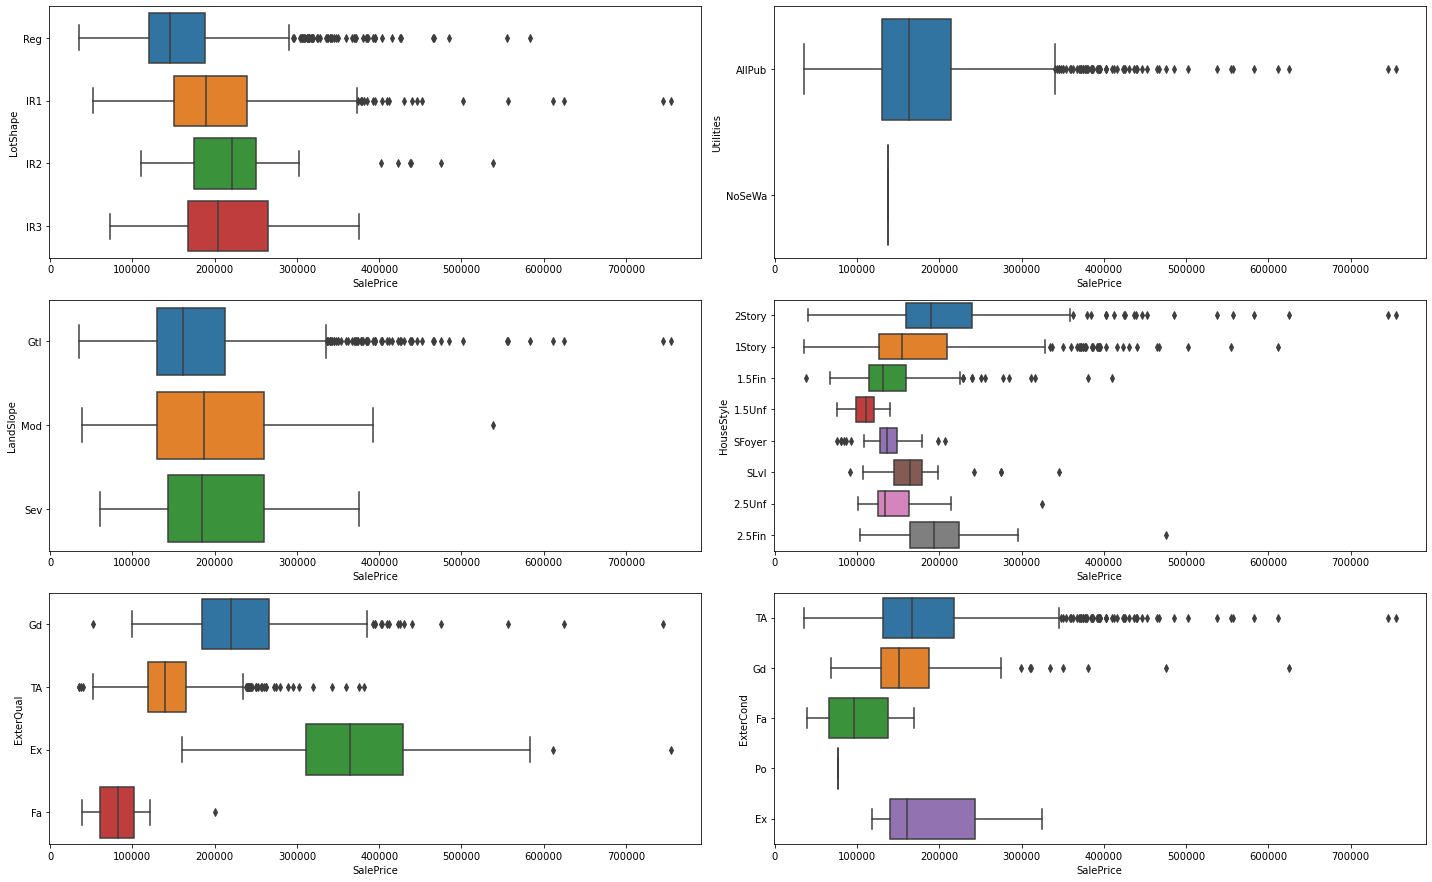

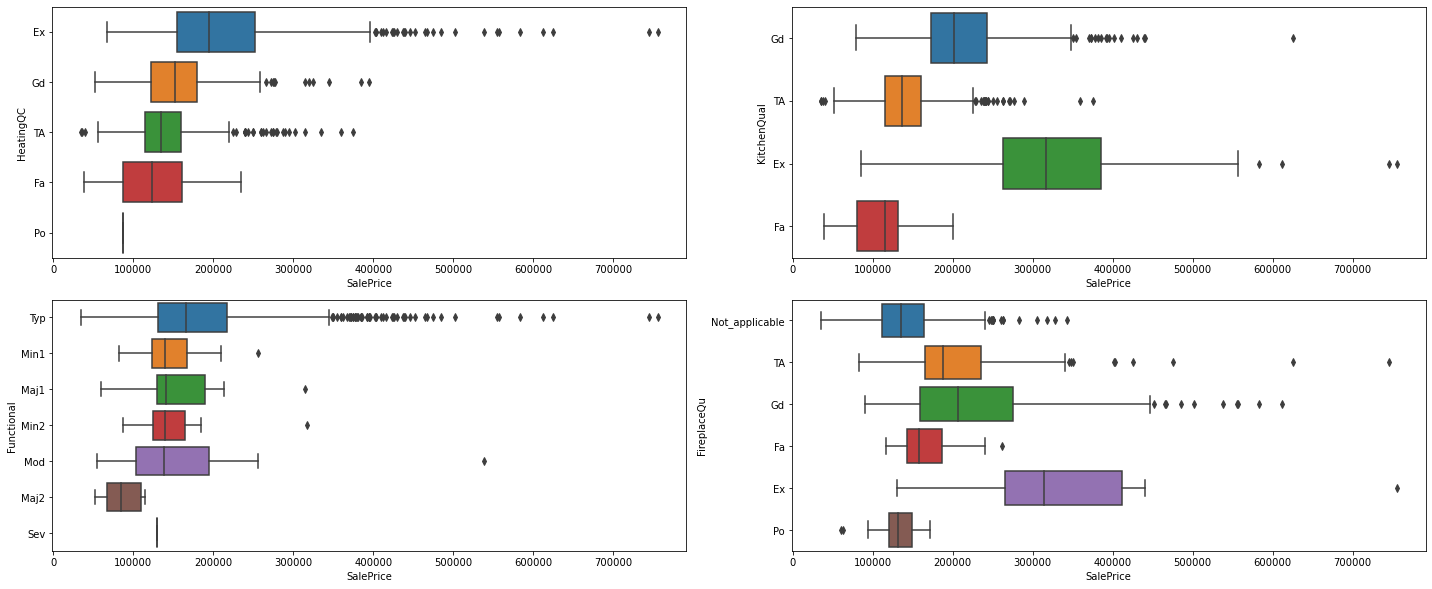

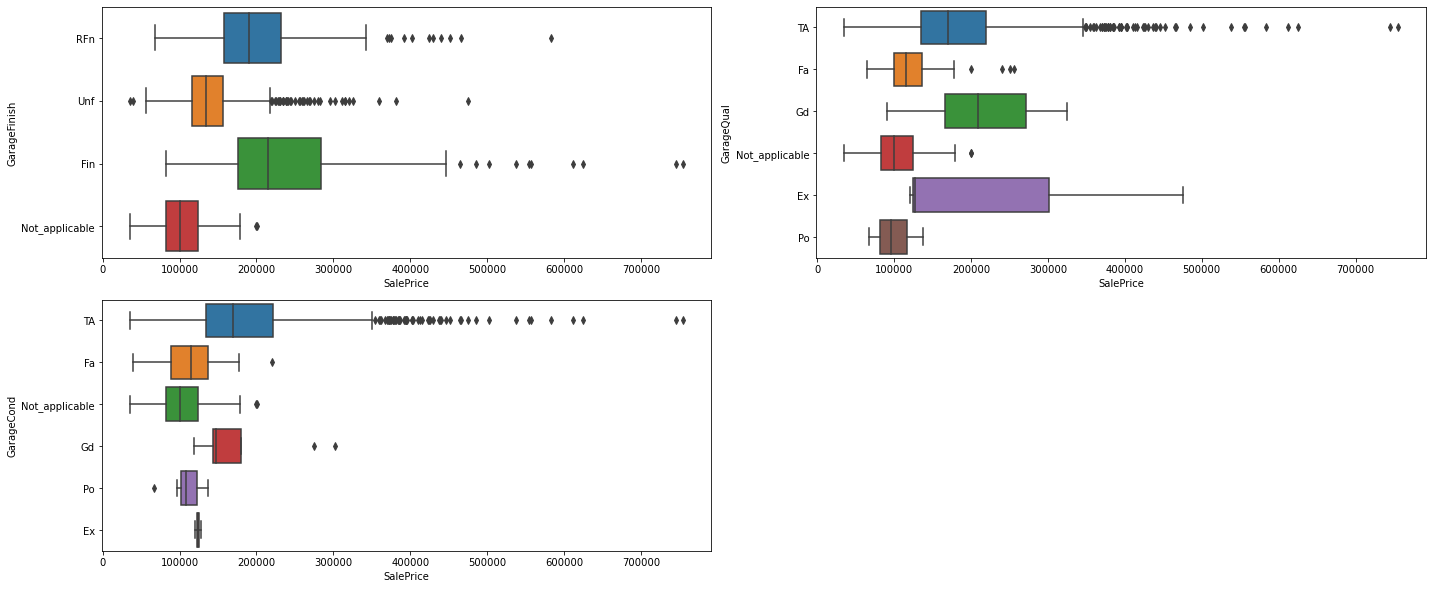

In [31]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(ext_features)
generate_boxplot(int_features)
generate_boxplot(garage_features)

** exterior **

- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice.

** interior **

- Houses having excellent heating quality and kitchen quality have the highest SalePrice
- Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- SalePrice range in largest for houses with average fireplace quality.

** garage **

- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.

#### Encoding Categorical Features 

In [32]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [33]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1459 non-null   int64
 1   Utilities     1459 non-null   int64
 2   LandSlope     1459 non-null   int64
 3   HouseStyle    1459 non-null   int64
 4   ExterQual     1459 non-null   int64
 5   ExterCond     1459 non-null   int64
 6   BsmtQual      1459 non-null   int64
 7   BsmtCond      1459 non-null   int64
 8   BsmtExposure  1459 non-null   int64
 9   BsmtFinType1  1459 non-null   int64
 10  BsmtFinType2  1459 non-null   int64
 11  HeatingQC     1459 non-null   int64
 12  KitchenQual   1459 non-null   int64
 13  Functional    1459 non-null   int64
 14  FireplaceQu   1459 non-null   int64
 15  GarageFinish  1459 non-null   int64
 16  GarageQual    1459 non-null   int64
 17  GarageCond    1459 non-null   int64
dtypes: int64(18)
memory usage: 248.9 KB


#### Analyzing Unordered Featues

In [34]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

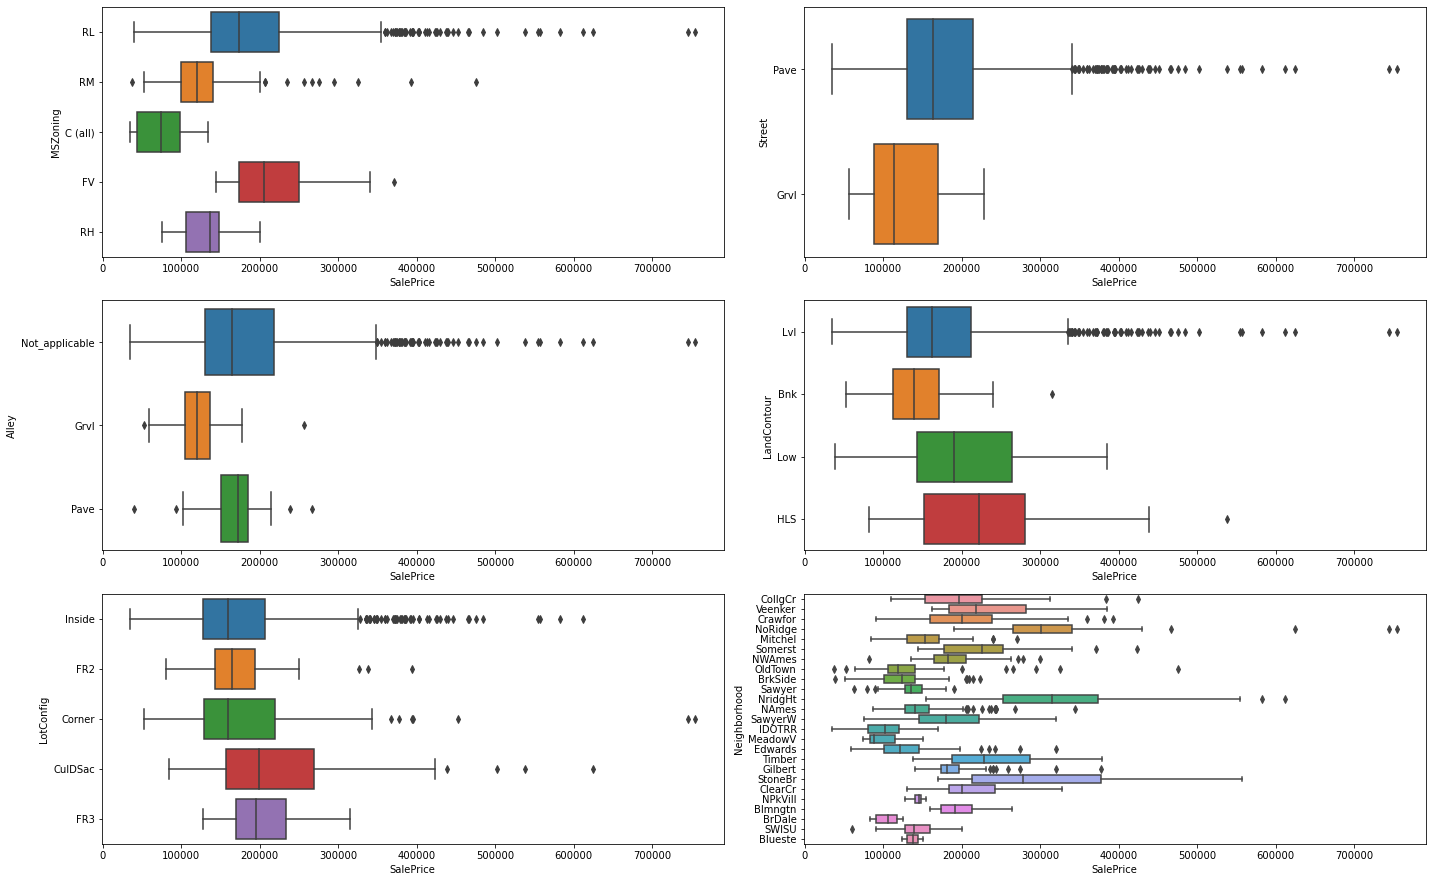

In [35]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

**Comment:**

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

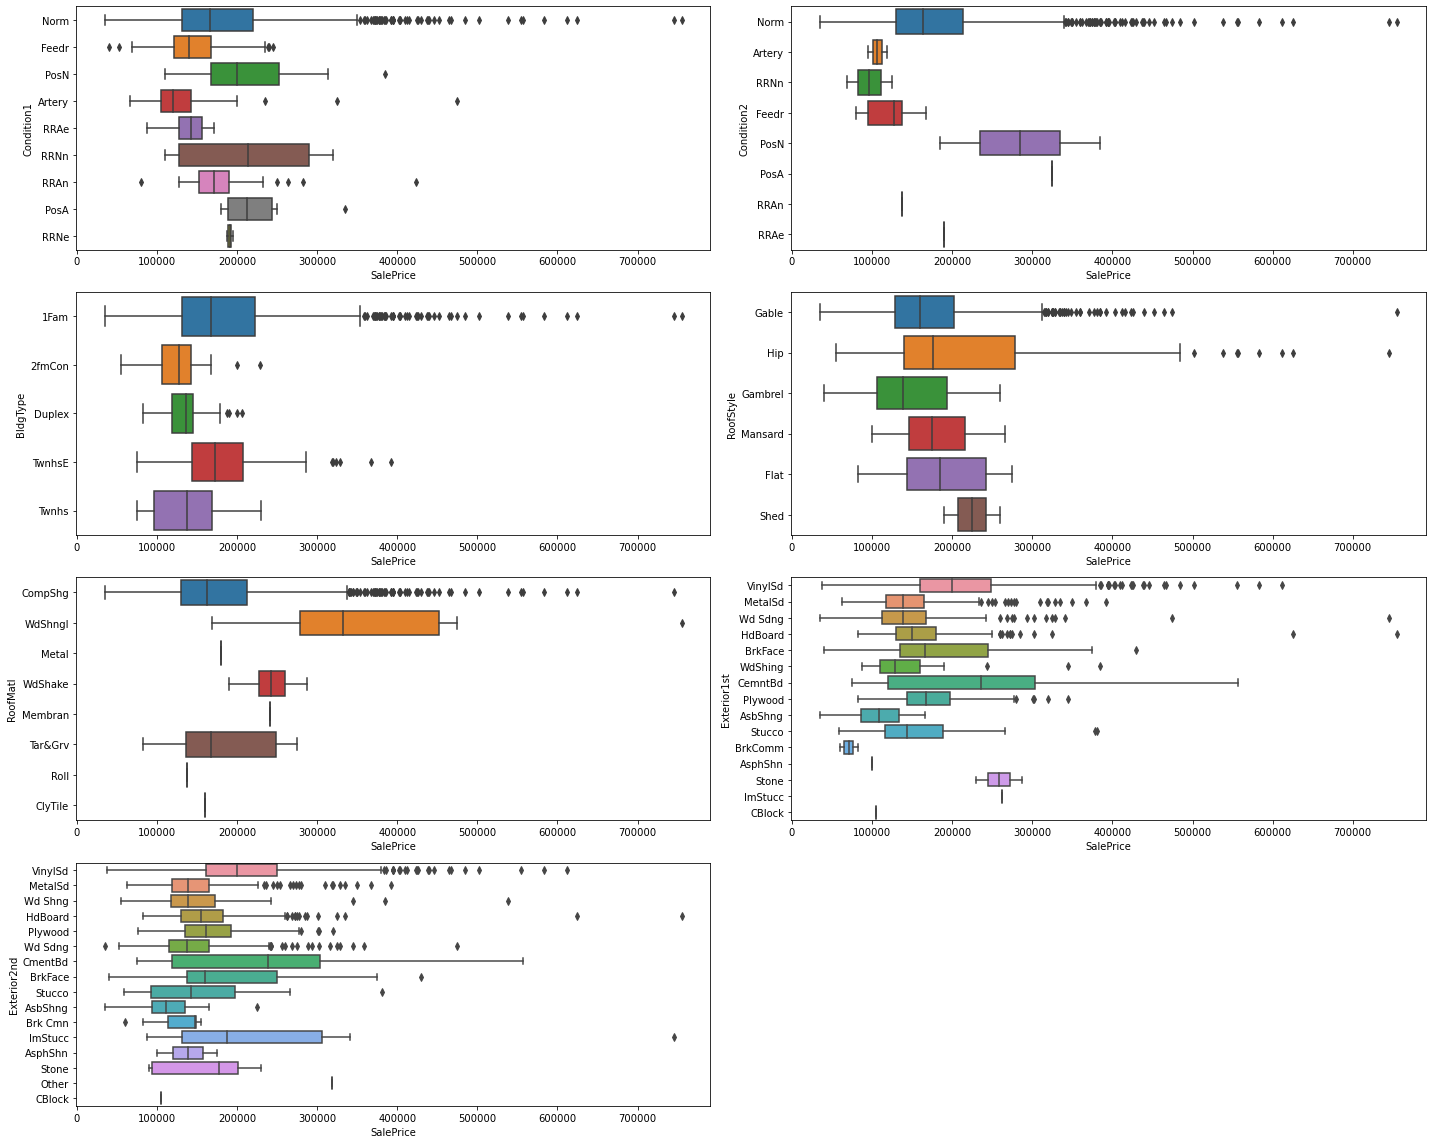

In [36]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

**Comment:**
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.



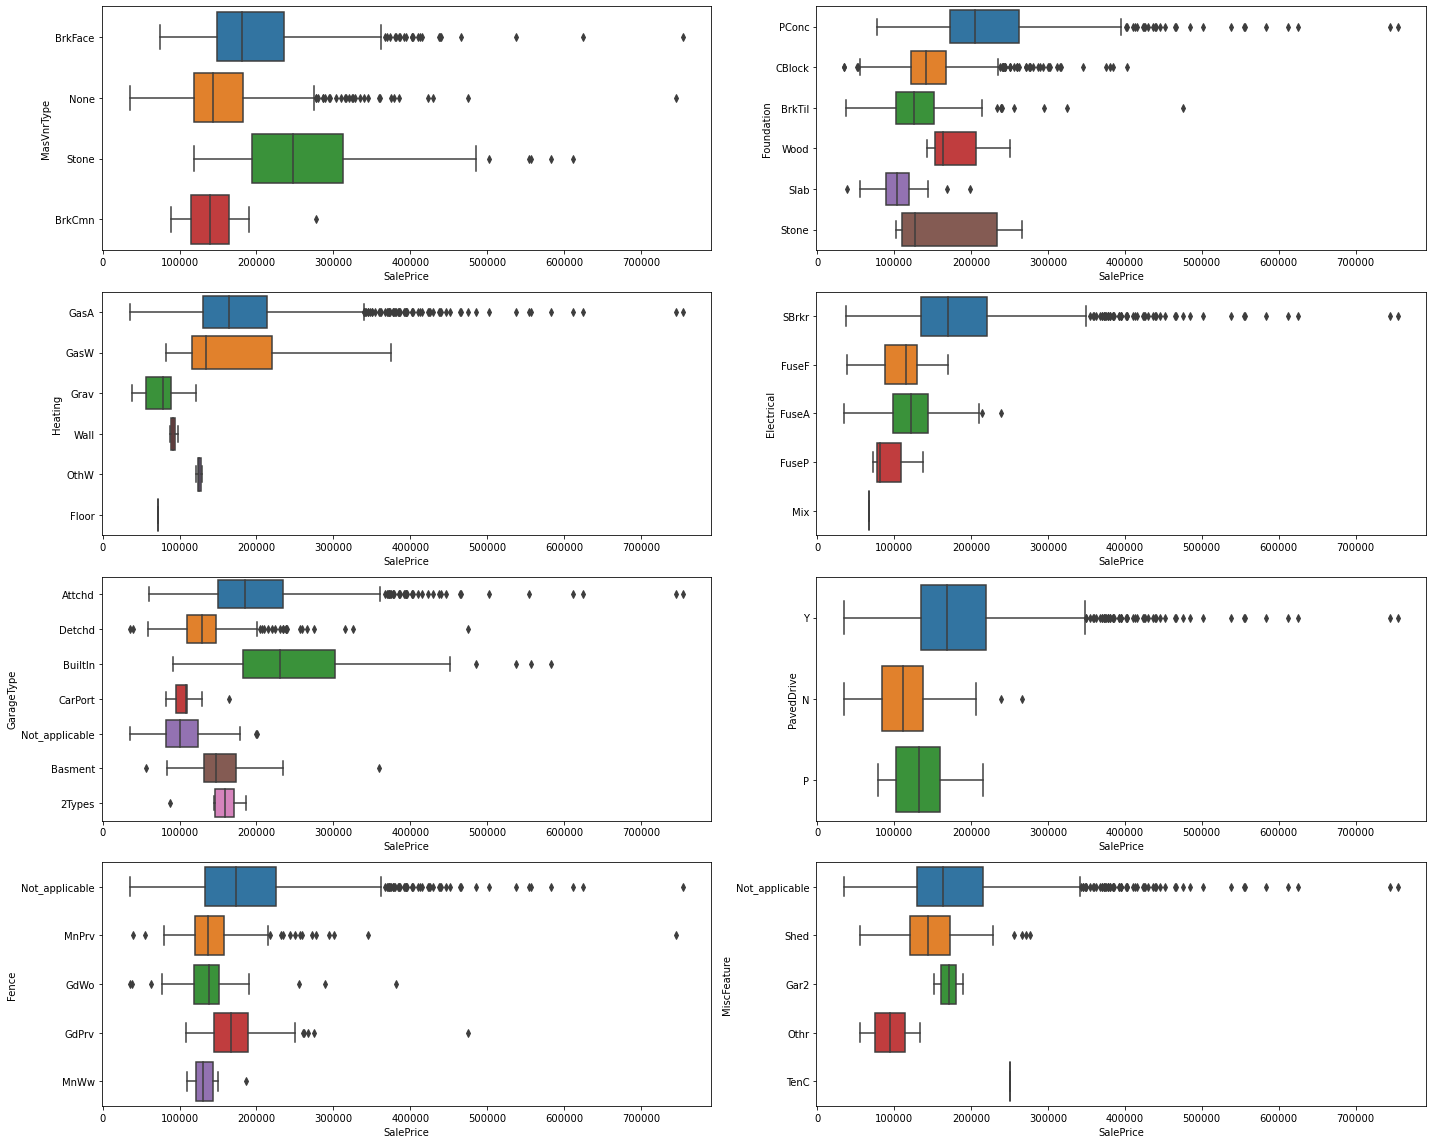

In [37]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

**Comment:**

- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)

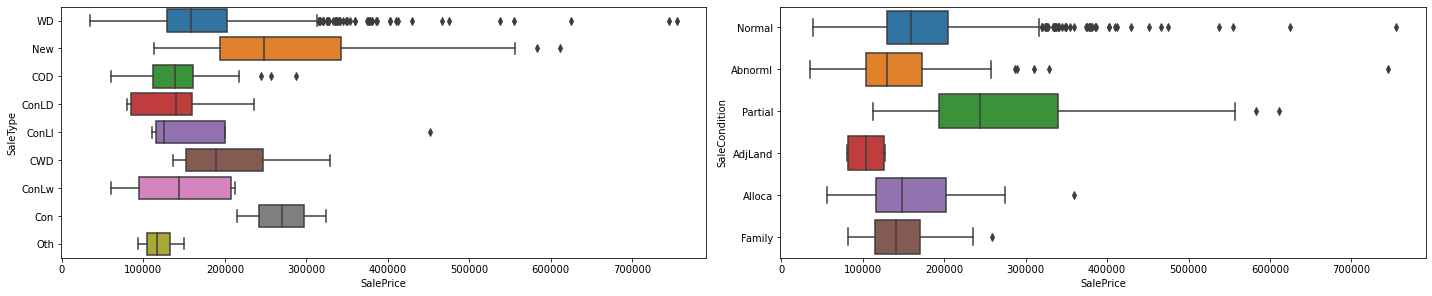

In [38]:
generate_boxplot(['SaleType','SaleCondition'])

**Comment:**

- Most of the houses are newly built, houses with warranty deed have high SalePrice
- Sale condition = Normal leads to high SalePrice

#### Encoding Categorical Variables

In [39]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)
dummy_df.shape

(1459, 144)

**Comment:**

- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [40]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [41]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1459, 52)


In [42]:
housing_df.shape

(1459, 58)

In [43]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [44]:
housing_df.shape

(1459, 87)

### Step 5. Splitting into Train and Test Data

In [45]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,1stFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,MoSold,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not_applicable,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,8450.0,3,3,0,3,7,5.0,18,18,3,2,4,3,1,6,1,4,1,856.0,1.0,2,1,3.0,3,8,0,0.0,0,2,548.0,3,3,2,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0
1,20,9600.0,3,3,0,0,6,7.5,45,45,2,2,4,3,4,5,1,4,1,1262.0,0.0,2,0,3.0,2,6,0,1.0,3,2,460.0,3,3,5,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0
2,60,11250.0,0,3,0,3,7,5.0,20,19,3,2,4,3,2,6,1,4,1,920.0,1.0,2,1,3.0,3,6,0,1.0,3,2,608.0,3,3,9,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0
3,70,9550.0,0,3,0,3,7,5.0,106,51,2,2,3,4,1,5,1,3,1,961.0,1.0,1,0,3.0,3,7,0,1.0,4,1,642.0,3,3,2,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0
4,60,14260.0,0,3,0,3,8,5.0,21,21,3,2,4,3,3,6,1,4,1,1145.0,1.0,2,1,4.0,3,9,0,1.0,3,2,836.0,3,3,12,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0


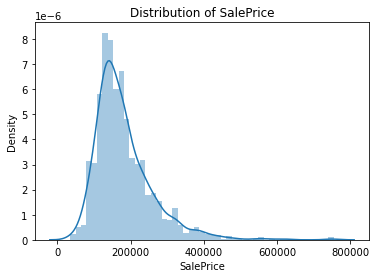

In [46]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

**Comment:** Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

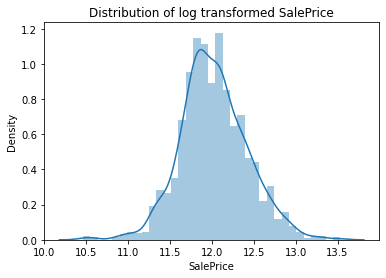

In [47]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [48]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1167, 86)
(292, 86)
(1167,)
(292,)


### Step 6. Feature Scaling

In [61]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [62]:
X_train.head()

,MSSubClass,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,1stFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,MoSold,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not_applicable,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
1026,20,9300.0,3,3,0,0,5,5.0,61,61,2,2,3,3,1,3,1,2,1,1264.0,1.0,1,0,3.0,2,6,0,2.0,4,1,461.0,3,3,4,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0
548,20,8235.0,0,3,0,0,5,7.0,66,26,2,3,3,3,1,2,3,2,1,825.0,1.0,1,0,2.0,2,4,0,0.0,0,2,720.0,3,3,6,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0
1442,60,11003.0,3,3,0,3,10,5.0,13,13,4,2,5,3,3,6,1,4,1,1026.0,1.0,2,1,3.0,4,10,0,1.0,5,3,812.0,3,3,4,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0
330,90,10624.0,0,3,0,0,5,4.0,57,57,2,2,3,3,1,6,3,2,1,1728.0,0.0,2,0,4.5,2,10,0,0.0,0,1,352.0,3,3,11,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,1,0
193,145,2522.0,3,3,0,3,7,5.0,17,17,3,2,4,3,1,1,1,4,1,970.0,0.0,2,0,3.0,3,7,4,0.0,0,1,380.0,3,3,5,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0,1,1,0,1,1,0


In [63]:
X_train_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [65]:
# Checking the features after 

print(X_train_scaled) # train data
print(X_test_scaled) # test data

      MSSubClass   LotArea  LotShape  Utilities  LandSlope  HouseStyle  \
0      -0.928660 -0.103282  0.748982   0.029285  -0.229851   -0.845970   
1      -0.928660 -0.400468 -1.377690   0.029285  -0.229851   -0.845970   
2       0.142500  0.371937  0.748982   0.029285  -0.229851    0.690203   
3       0.945870  0.266178 -1.377690   0.029285  -0.229851   -0.845970   
4       2.418715 -1.994670  0.748982   0.029285  -0.229851    0.690203   
...          ...       ...       ...        ...        ...         ...   
1162   -0.928660 -0.130071  0.748982   0.029285  -0.229851   -0.845970   
1163    2.418715 -2.253069  0.748982   0.029285  -0.229851    2.738432   
1164    2.418715 -2.154286  0.748982   0.029285  -0.229851    0.690203   
1165   -0.928660  1.810430 -1.377690   0.029285   3.444614   -0.845970   
1166   -0.928660 -0.485299  0.748982   0.029285  -0.229851   -0.845970   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  ExterQual  ExterCond  \
0       -0.813783    -0.561254

### Step 7.Initial Feature Selection with RFE

In [66]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_train_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_train_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [67]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'MSZoning_RL', 'Alley_Not_applicable', 'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'Exterior1st_HdBoard', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal']
Top 50 features : 
['LotArea', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF

In [68]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary()) 

In [70]:
build_regressor(X_train_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:54:30   Log-Likelihood:                 773.75
No. Observations:                1167   AIC:                            -1455.
Df Residuals:                    1121   BIC:                            -1223.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [72]:
build_regressor(X_train_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     209.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:55:13   Log-Likelihood:                 778.94
No. Observations:                1167   AIC:                            -1456.
Df Residuals:                    1116   BIC:                            -1198.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [73]:
build_regressor(X_train_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     192.4
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:55:18   Log-Likelihood:                 786.11
No. Observations:                1167   AIC:                            -1460.
Df Residuals:                    1111   BIC:                            -1177.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Comment:** By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [74]:
X_train_rfe = X_train_scaled[top_50]
X_test_rfe = X_test_scaled[top_50]

In [75]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

## Ridge Regression

In [76]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 100.000000
ridge  Regression with  100
R2 score (train) :  0.9020609864160686
R2 score (test) :  0.8591688998758671
RMSE (train) :  0.1252687639453735
RMSE (test) :  0.14862291951821605


**Comment:** Ridge Regression model was able to achieve R2 score of 0.859 on test data i.e. 85.9% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1486 on test data, that means the prediction made by the model can off by 0.1486 unit.

## Lasso Regression

In [78]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9031009713684458
R2 score (test) :  0.8618015366954971
RMSE (train) :  0.12460189321652129
RMSE (test) :  0.14722721919726536


**Comment:** Lasso Regression model was able to achieve R2 score of 0.86 on test data i.e. 86% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1472 on test data, that means the prediction made by the model can off by 0.1472 unit.

### Comparing Model Coefficients

In [94]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=100)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
model_coefficients

,Ridge (alpha=100),Lasso (alpha=0.001)
LotArea,0.041865,0.044386
LandSlope,0.007976,0.008034
HouseStyle,0.010545,0.010195
OverallQual,0.082741,0.098495
OverallCond,0.039633,0.042852
YearBuilt,-0.015938,-0.013839
ExterQual,0.020801,0.015888
BsmtQual,0.028073,0.025877
BsmtFinType1,0.023026,0.023535
HeatingQC,0.014284,0.013559


In [95]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[155305 164661  93701 163973 154136]


### Final Model

Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [96]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
OverallQual,0.098495
1stFlrSF,0.074911
LotArea,0.044386
OverallCond,0.042852
FullBath,0.037195
HalfBath,0.036893
TotRmsAbvGrd,0.035284
GarageArea,0.032342
SaleType_New,0.032049
SaleCondition_Normal,0.027852


In [97]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['OverallQual', '1stFlrSF', 'LotArea', 'OverallCond', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'GarageArea', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object')

### Summary

- Step 1. Importing modules, Reading the data


- Step 2. Analyzing Numerical Data


- Step 3: Univariate and Bivariate Analysis - Numerical Features(All the features are then analyzed, missing data handling, outlier detection, data cleaning are done)


- step 4. Analyzing Categorical Features. categorical features are encoded accordingly(Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped for Ordered categorical variable).


- Step 5. Splitting into Train and Test Data, feature scaling is performed.


- Step 6. Feature Scaling


- Top 50 features are selected through RFE and adjusted R-square. 50 features : 
['LotArea', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'MSZoning_RL', 'Alley_Not_applicable', 'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'Exterior1st_HdBoard', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']


- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 100 for ridge and 0.001 for lasso model.Model evaluation is done with R2 score and Root Mean Square Error.Lasso Regression is chosen as final model for having slightly better R-square value on test data.


- Out of 50 features in the final model, top 10 features in order of descending importance are ['OverallQual', '1stFlrSF', 'LotArea', 'OverallCond', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'GarageArea', 'SaleType_New', 'SaleCondition_Normal']


- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.098495 with unit change in the feature 'OverallQual' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 


- Predicted value of SalePrice is tranformed into its original scale by performing antilog. 



### Subjective Questions Code

In [102]:
# Model Building
ridge_model = Ridge(alpha=200.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=200.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=200.0
R2 score (train) :  0.8995
R2 score (test) :  0.8571
RMSE (train) :  0.1269
RMSE (test) :  0.1497


In [101]:
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9018
R2 score (test) :  0.863
RMSE (train) :  0.1254
RMSE (test) :  0.1466


In [100]:
model_coefficients['Ridge (alpha = 200.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
model_coefficients

,Ridge (alpha=100),Lasso (alpha=0.001),Ridge (alpha = 200.0),Lasso (alpha = 0.002)
LotArea,0.041865,0.044386,0.039767,0.044023
LandSlope,0.007976,0.008034,0.007819,0.007617
HouseStyle,0.010545,0.010195,0.009785,0.008374
OverallQual,0.082741,0.098495,0.074521,0.100867
OverallCond,0.039633,0.042852,0.035802,0.041297
YearBuilt,-0.015938,-0.013839,-0.015609,-0.011764
ExterQual,0.020801,0.015888,0.023778,0.017075
BsmtQual,0.028073,0.025877,0.029406,0.027015
BsmtFinType1,0.023026,0.023535,0.022376,0.023120
HeatingQC,0.014284,0.013559,0.015032,0.013636


In [88]:
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(1)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
OverallQual,0.082741,0.098495,0.092987,0.096424


In [89]:
model_coefficients.sort_values(by='Ridge (alpha = 18.0)', ascending=False).head(1)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
OverallQual,0.082741,0.098495,0.092987,0.096424


In [90]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
OverallQual,0.082741,0.098495,0.092987,0.096424
1stFlrSF,0.066591,0.074911,0.075069,0.077349
LotArea,0.041865,0.044386,0.044270,0.044772
OverallCond,0.039633,0.042852,0.043386,0.043935
FullBath,0.035606,0.037195,0.036807,0.037103


In [91]:
X_train_new = X_train_rfe.drop(['1stFlrSF', 'LotArea', 'OverallQual', 'OverallCond', 'FullBath'], axis=1)
X_test_new = X_test_rfe.drop(['1stFlrSF', 'LotArea', 'OverallQual', 'OverallCond', 'FullBath'], axis=1)

In [92]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)
lasso_model.coef_

array([ 0.0133581 ,  0.00228233, -0.01093896,  0.04508774,  0.04878871,
        0.0271132 ,  0.01923938,  0.02687103,  0.02032647,  0.00893429,
        0.02263897,  0.05175644,  0.08736573, -0.02729671,  0.05325184,
        0.01617977,  0.07263567,  0.03153703, -0.01337629,  0.02381754,
       -0.02029027, -0.02430319, -0.01522284, -0.02123989, -0.00560247,
       -0.01044138, -0.01563974,  0.00397498,  0.01442384,  0.0062692 ,
       -0.02740204, -0.01490114,  0.00017522,  0.00124884,  0.00578819,
        0.01072776, -0.01997865,  0.041763  ,  0.01386837,  0.01323027,
        0.01616254,  0.01526478,  0.03813059,  0.03285417, -0.00210146])

In [93]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
TotRmsAbvGrd,0.087366
GarageArea,0.072636
Fireplaces,0.053252
KitchenQual,0.051756
BsmtQual,0.048789
